In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon

import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

import folium
from folium.plugins import HeatMap

### Load data

In the data dive folder the prepared data is grouped by district name.  In order to load data from folder, start typing folder name in quotes like **"Nagornyj/"** and after that press Tab button to see files stored in a folder. 
First, load the following:

#### Load district boundary

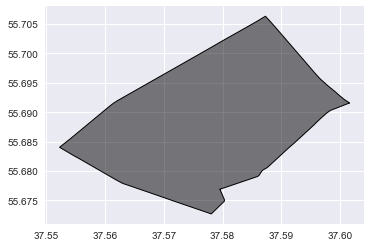

In [7]:
district = gpd.read_file('Akademicheskij/Akademicheskij_district.geojson')
district.plot()

#### Load google places

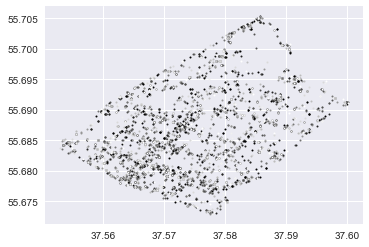

In [8]:
google_places = gpd.read_file('Akademicheskij/Akademicheskij_google_places.geojson')
google_places.plot()

#### Load khrushchevki

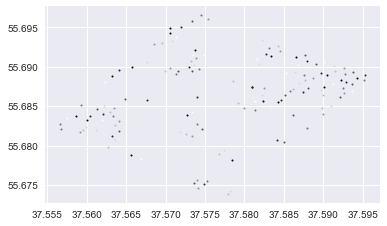

In [10]:
krushchevki=gpd.read_file('Akademicheskij/Akademicheskij_chruchevki.geogson')
krushchevki.plot()

#### Group google places by column **newtype** and draw the barplot. What are the most frequent venues?

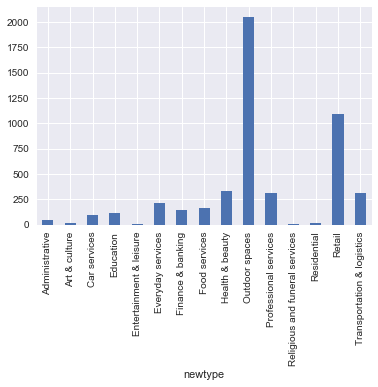

In [12]:


google_places.groupby('newtype', sort=True).size().plot(kind='bar')

In [13]:
google_places.shape

(4889, 7)

Great. Now you know something about google places but we are interested in spatial distribution of these places across a given district. 

In [14]:
google_places.head()


,geometry,id,lat,lon,name,newtype,type
0,POINT (37.5965601 55.6947575),ChIJc68f5KBMtUYRGH4rbsFM0lg,55.694758,37.596560,Avto-Trans torgovo-muvingovaya kompaniya,Outdoor spaces,point_of_interest
1,POINT (37.596373 55.694368),ChIJu7ot4KBMtUYRuqxa2yEzi4s,55.694368,37.596373,Skhod-razval,Retail,store
2,POINT (37.59610539999998 55.6945141),ChIJlXRXk6BMtUYRzk0ChOf0cJE,55.694514,37.596105,Remont generatorov i starterov - Kompaniya Vol...,Car services,car_repair
3,POINT (37.5860219 55.70500260000001),ChIJYxRNqWNLtUYReU8I3kVWgtM,55.705003,37.586022,ООО Вайт Тайгер,Outdoor spaces,point_of_interest
4,POINT (37.5860219 55.70500260000001),ChIJYxRNqWNLtUYRTQNfUFVfBpo,55.705003,37.586022,Медицинский центр,Health & beauty,hospital


### Plot Maps

Before plotting the objects on the map, we need to define the base layer. Folium requires the initial point to create the map. The initial point will be the center of your district. Extract the centroid of your polygon and fill the coordinates below:

In [16]:
center_lat = list(district.centroid[0].coords)[0][1]
center_lon = list(district.centroid[0].coords)[0][0]

#### Plot the base layer

In [18]:
map_places = folium.Map([center_lat, center_lon], tiles='Stamen Toner', zoom_start=14,control_scale=True)
map_places

#### Add to the map khrushchevki locations and district boundary

In [24]:
map_khrush = folium.Map([center_lat, center_lon], tiles='Stamen Toner', zoom_start=14,control_scale=True)

#Define style for geojson objects
style_function = lambda feature: dict(fillColor='#AECCAE',
                                      color='#AECCAE',
                                      weight=1,
                                      opacity=0.3)

points = folium.features.GeoJson(krushchevki,name='Khurshevki houses')
polygon = folium.features.GeoJson(district, style_function=style_function,name='district boundary')

#adding points to the map
map_khrush.add_child(points,name='Khurshevki houses')
map_khrush.add_child(polygon,name='district boundary')

#Switch between layers
folium.LayerControl().add_to(map_khrush)
map_khrush

As you know your popular venue categories, you can plot the as a heatmap. Choose the venue categories and write them to the list

In [ ]:
categories = []#put your categories here

In [ ]:
venues = google_places[google_places['newtype'] == ]#put your category here

coords = list(zip(venues.lat, venues.lon))

#### Plot the coords as heatmap

You can add multiple categories to map